<a href="https://colab.research.google.com/github/WilliamLu1999/Data-Projects/blob/main/Unsupervised_Anomaly_Detection_Time_Series_Metro_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Anomaly Detection Time Series (Metro Predictive Maintenance)

### Table of Contents
* [Introduction](#section-1)
* [Methodologies](#section-2)
* [Prepare: Fetch Data](#section-3)
* [Process: Clean Data](#section-4)
* [Anomaly Detection](#section-5)
* [Summary](#section-6)




<a id="section-1"></a>
## Introduction

From a metro train in an operational context, readings from pressure, temperature, motor current, and air intake valves were collected from a compressor's Air Production Unit (APU). This dataset reveals real predictive maintenance challenges.

In this dataset, there are 1516948 instances and 15 features. It's an unlabeled time series data. This dataset was released in Mar 2023, but it recorded real status of a metro from Feb 2020 to Sep 2020.

You can access the dataset here: https://archive-beta.ics.uci.edu/dataset/791/metropt+3+dataset

Citation: Davari,Narjes, Veloso,Bruno, Ribeiro  ,Rita, and Gama,Joao. (2023). MetroPT-3 Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5VW3R.

## Methodologies

Anomaly detection is the process of identifying unusal/weird data among the dataset. Unsupervised anomaly detection is trying to detect unexpected data in the unlabeled dataset.

Assumptions about anomaly detection:

1. Anomalies rarely occur in the dataset.

2. Anomalies' features differ from the normal instances siginificantly.

In this notebook, we will use

reference: https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

## Prepare: Fetch Data

In [1]:
#pip install pyemma

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import seaborn as sns
import csv
import zipfile
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
#from pyemma import msm
%matplotlib inline
print('packages ready')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
packages ready


In [3]:
# because the file is a zip file, we need to unzip first then read it into the csv format
#with zipfile.ZipFile('/content/drive/MyDrive/data/metropt+3+dataset.zip', 'r') as zipf:
  #zipf.extractall('/content/drive/MyDrive/data/')

In [4]:
# read the csv
df =  pd.read_csv('/content/drive/MyDrive/data/MetroPT3(AirCompressor).csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15), ob

In [6]:
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Process Data

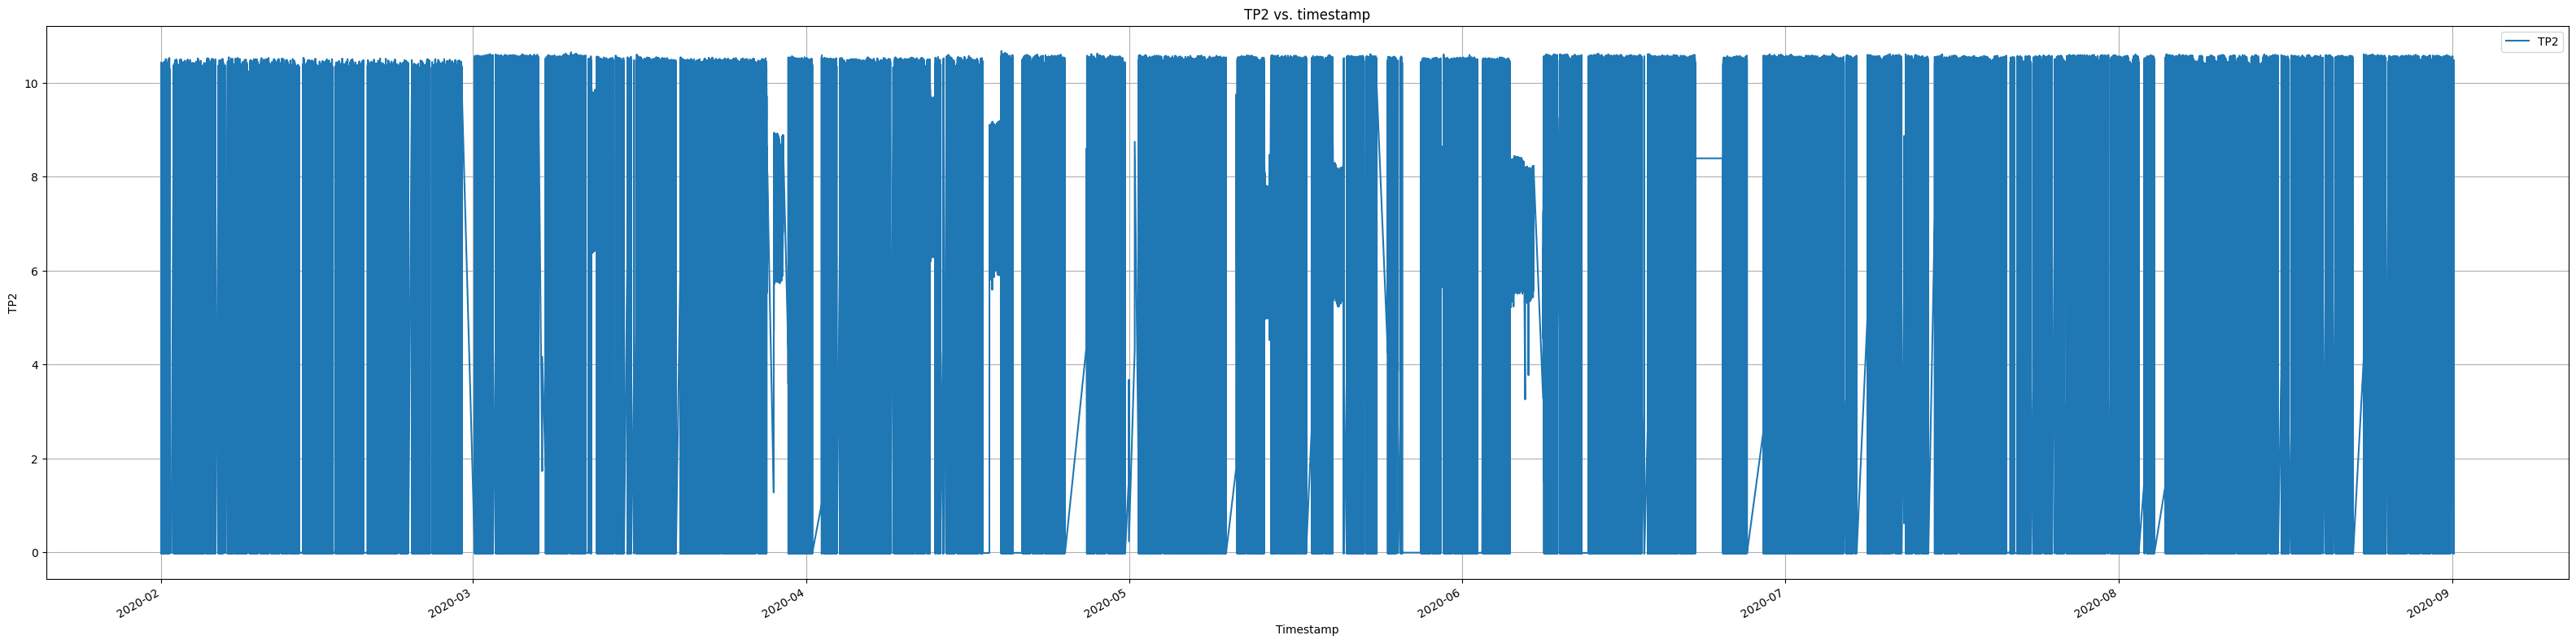

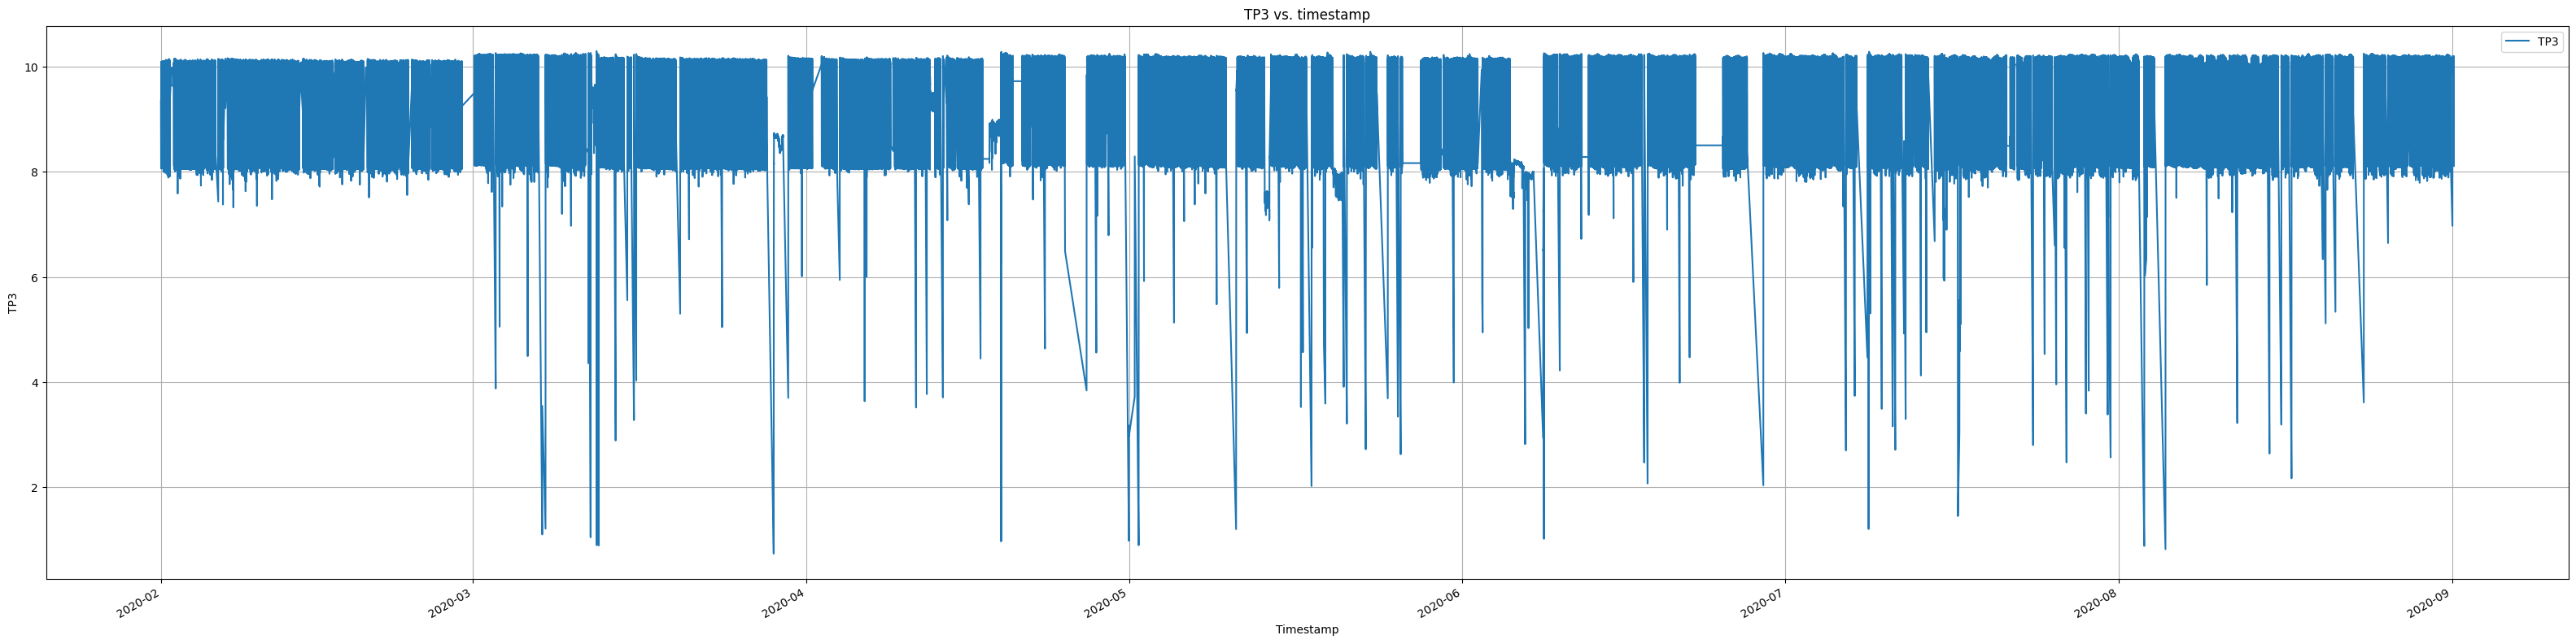

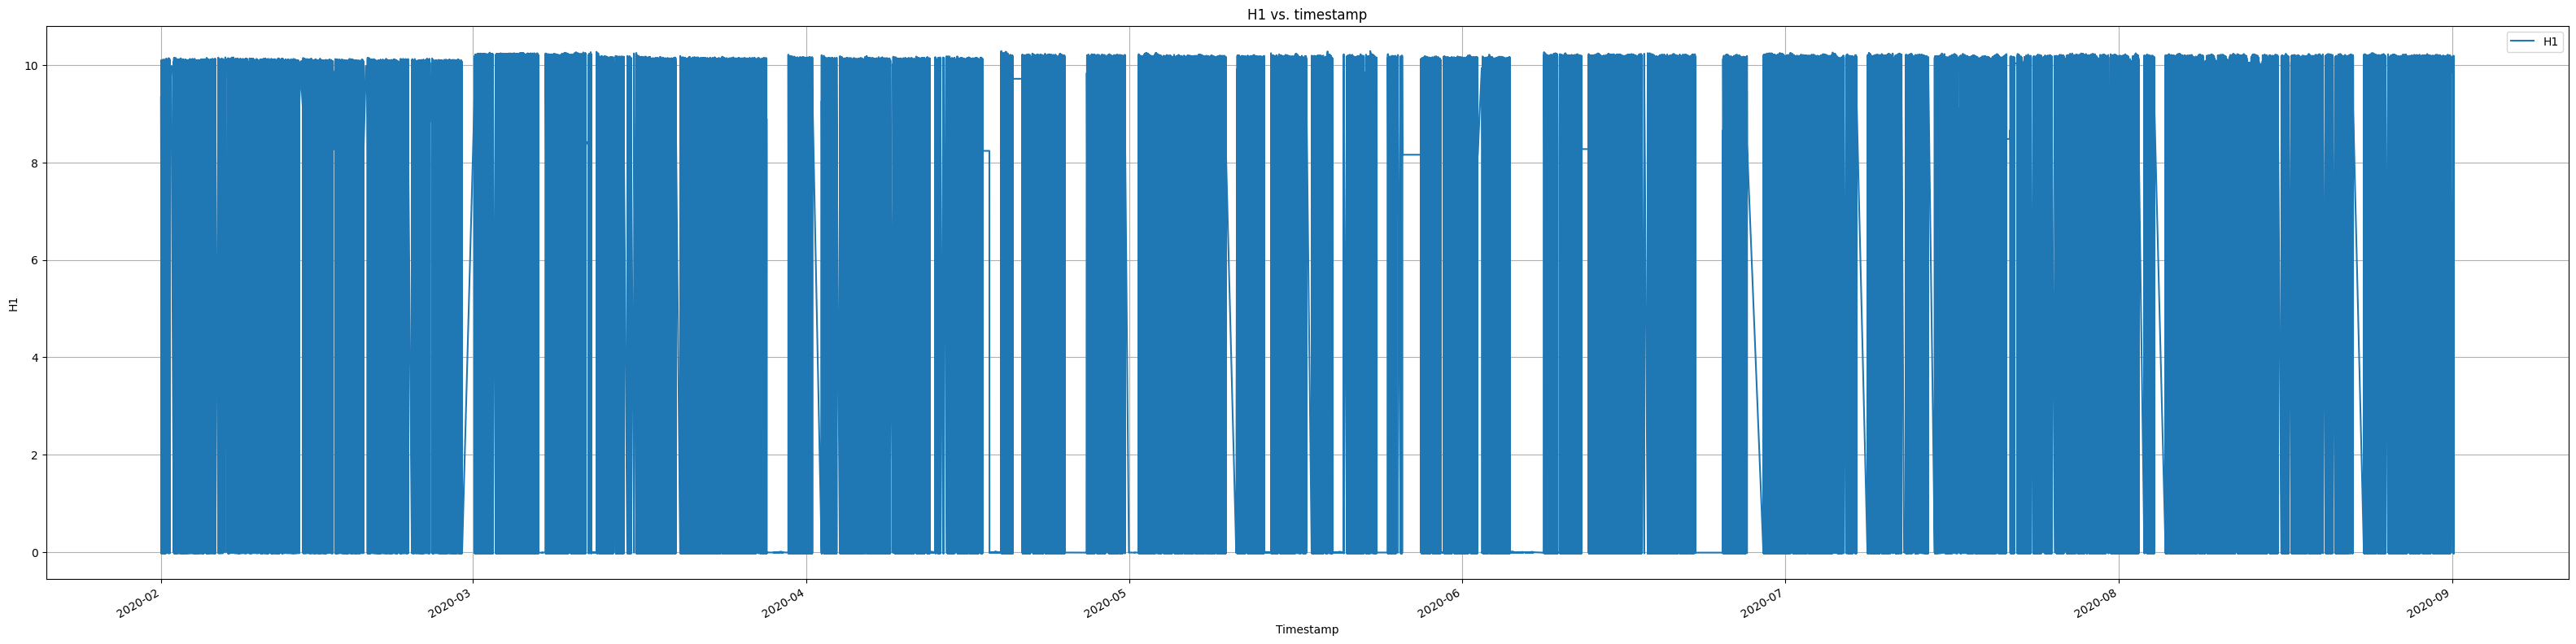

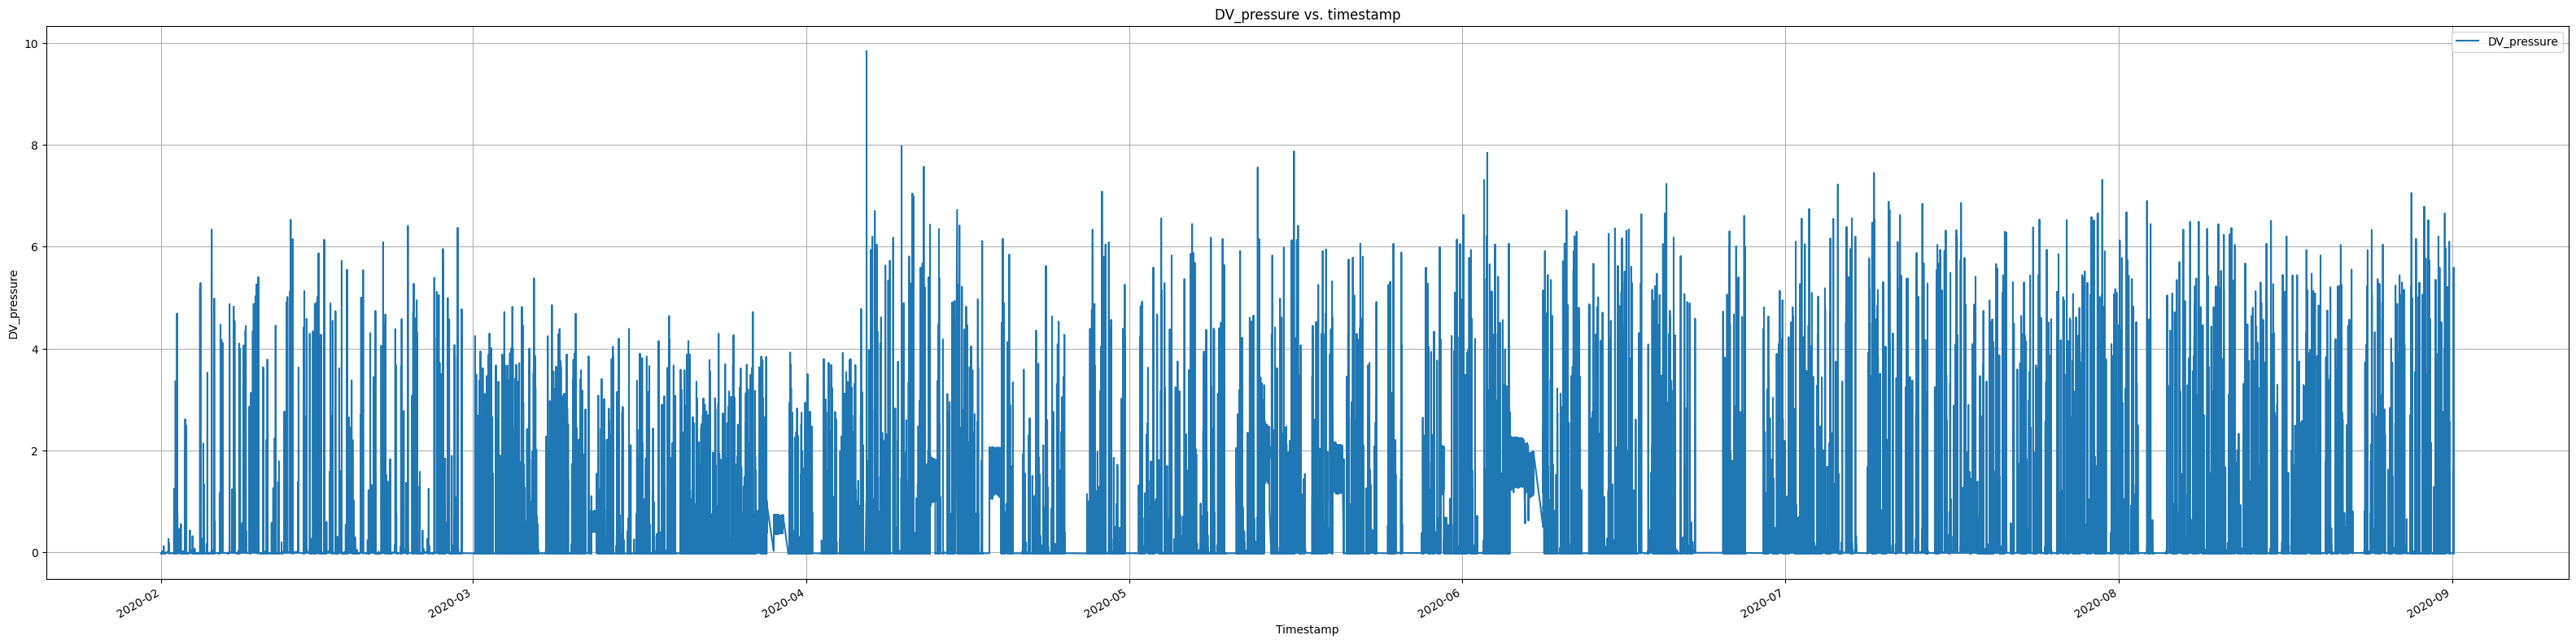

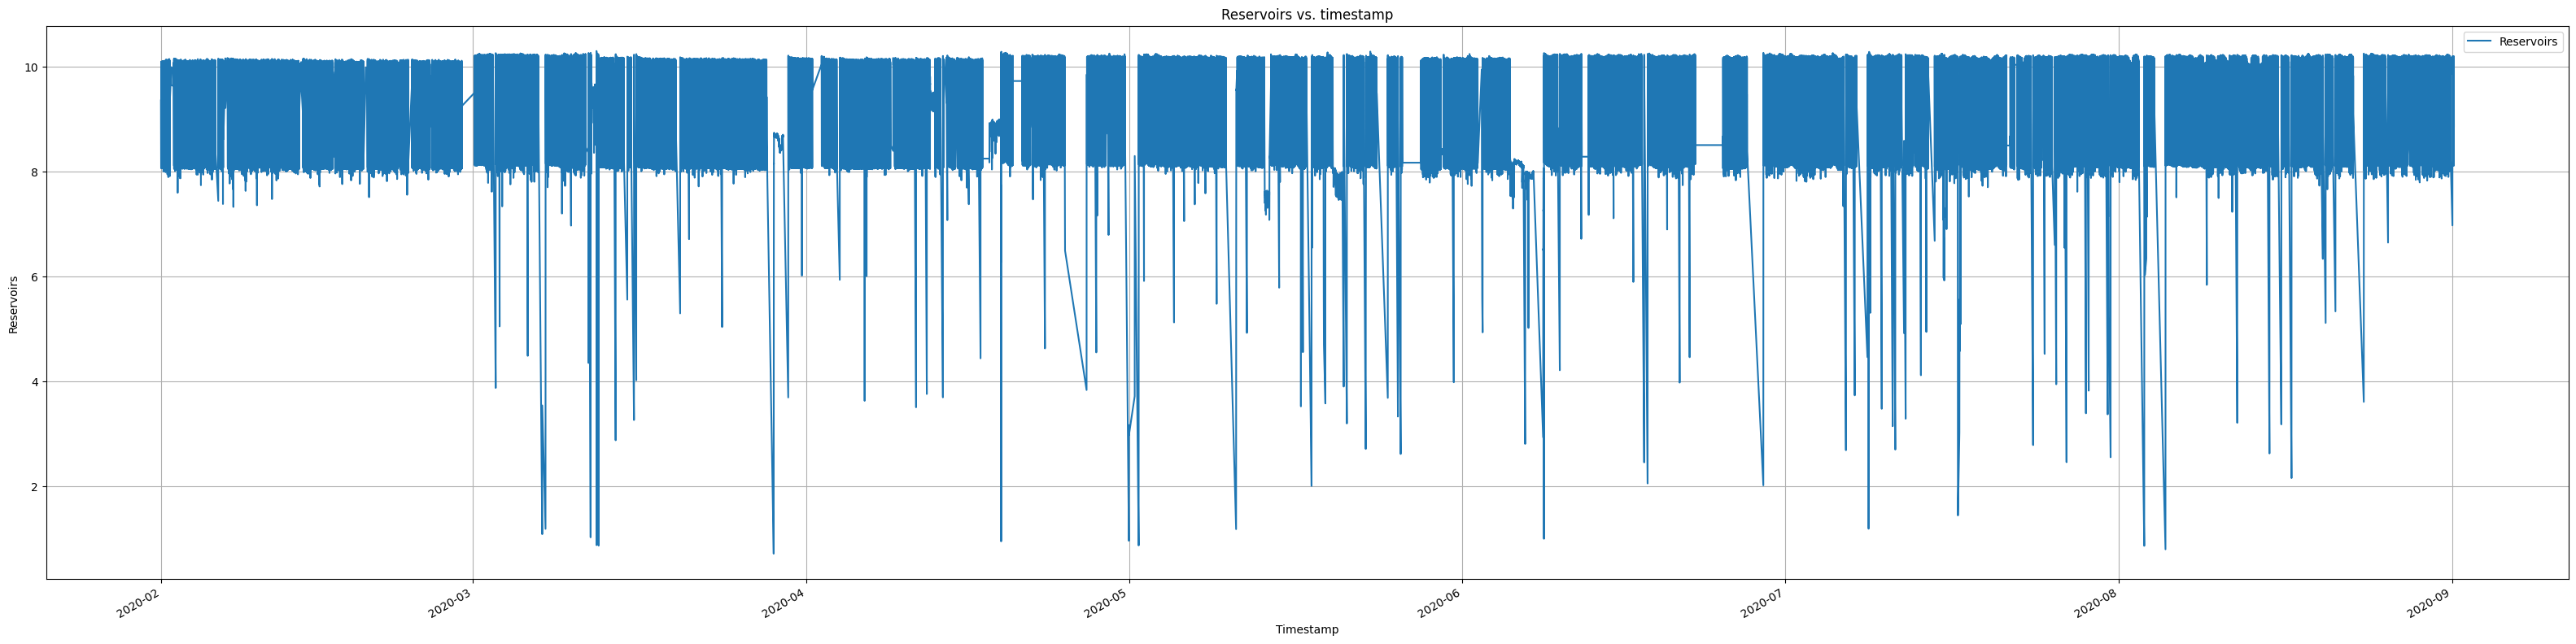

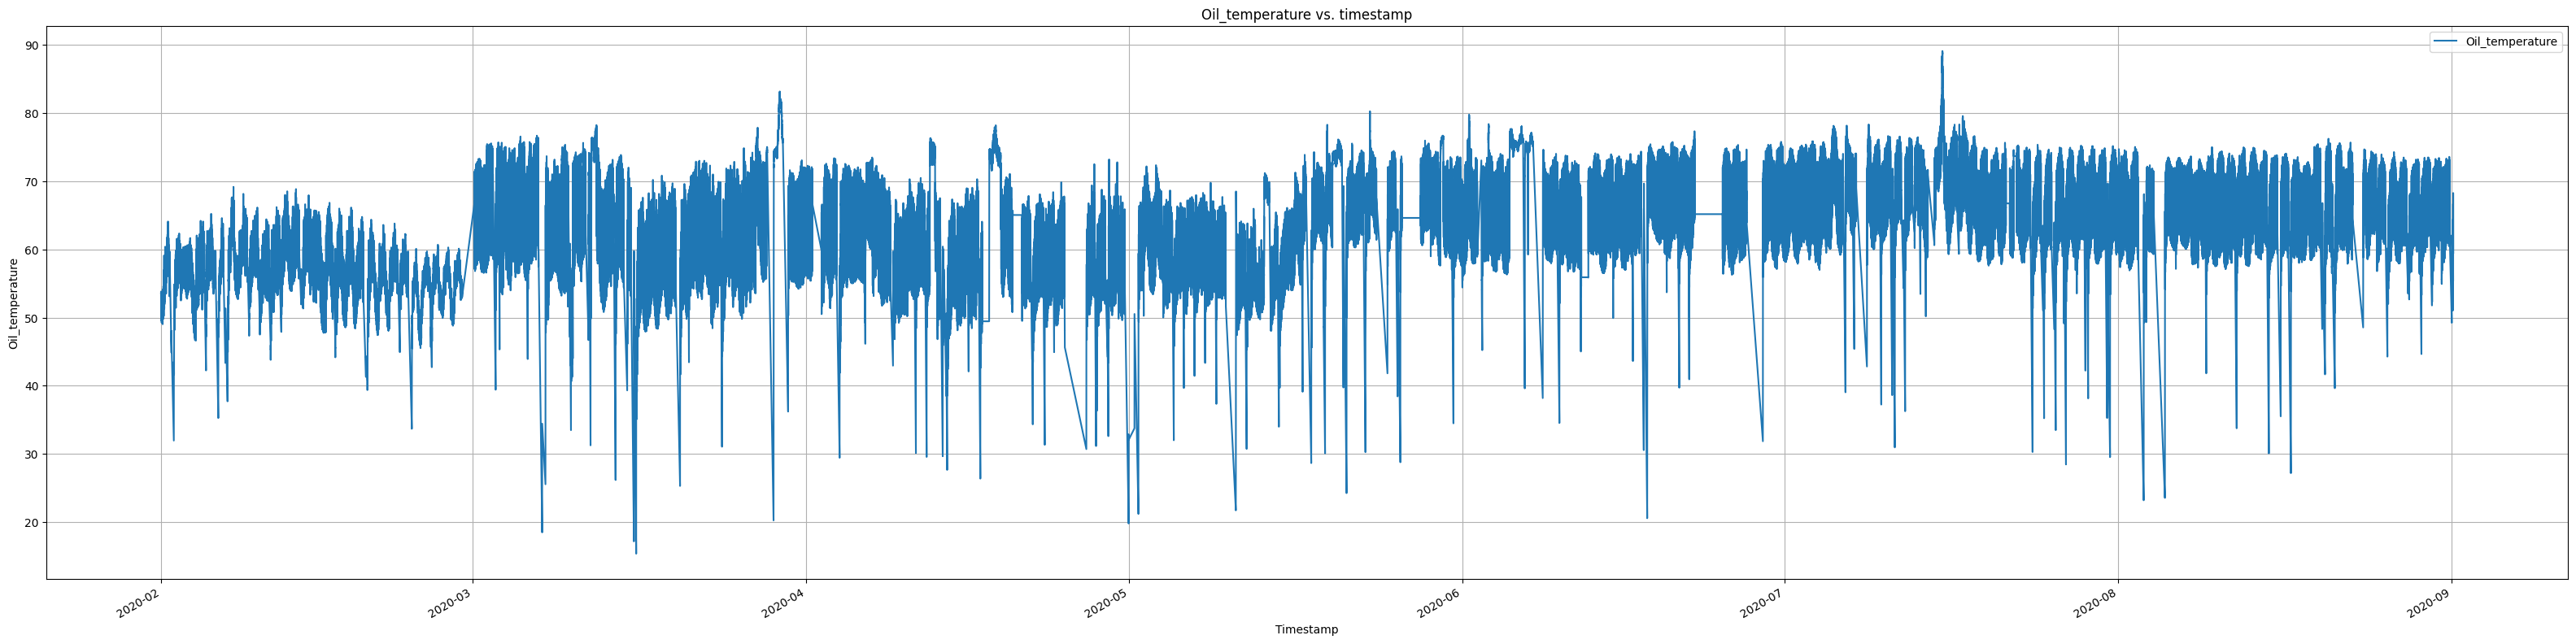

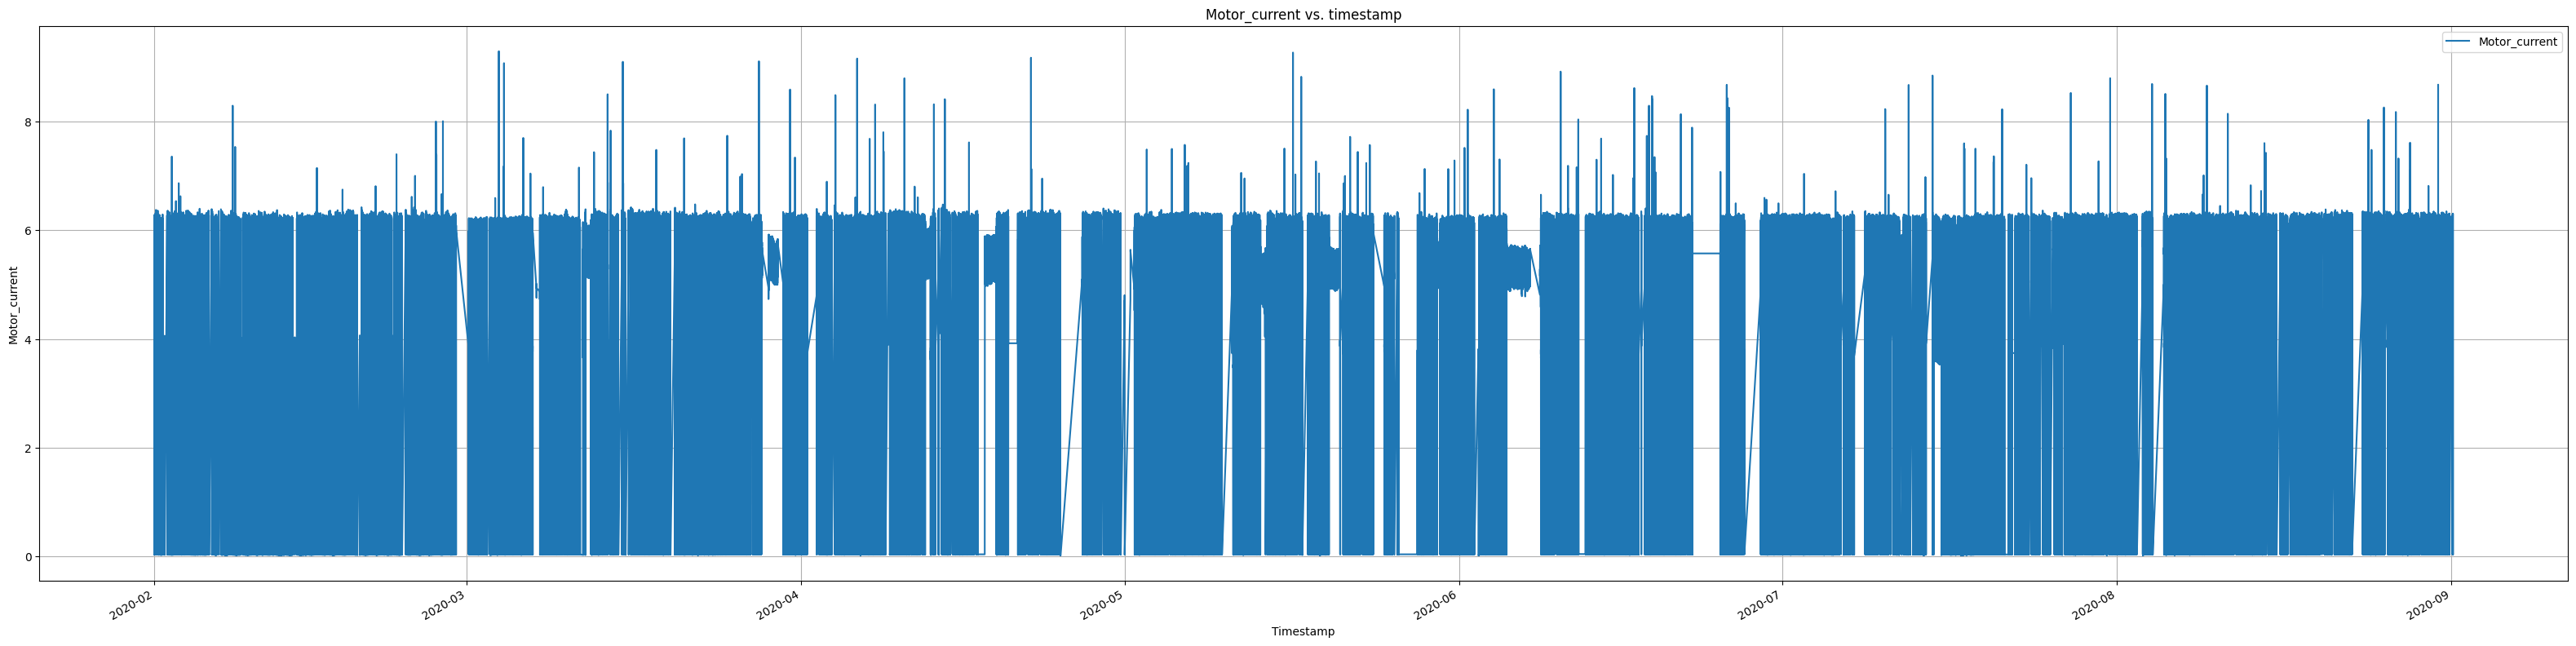

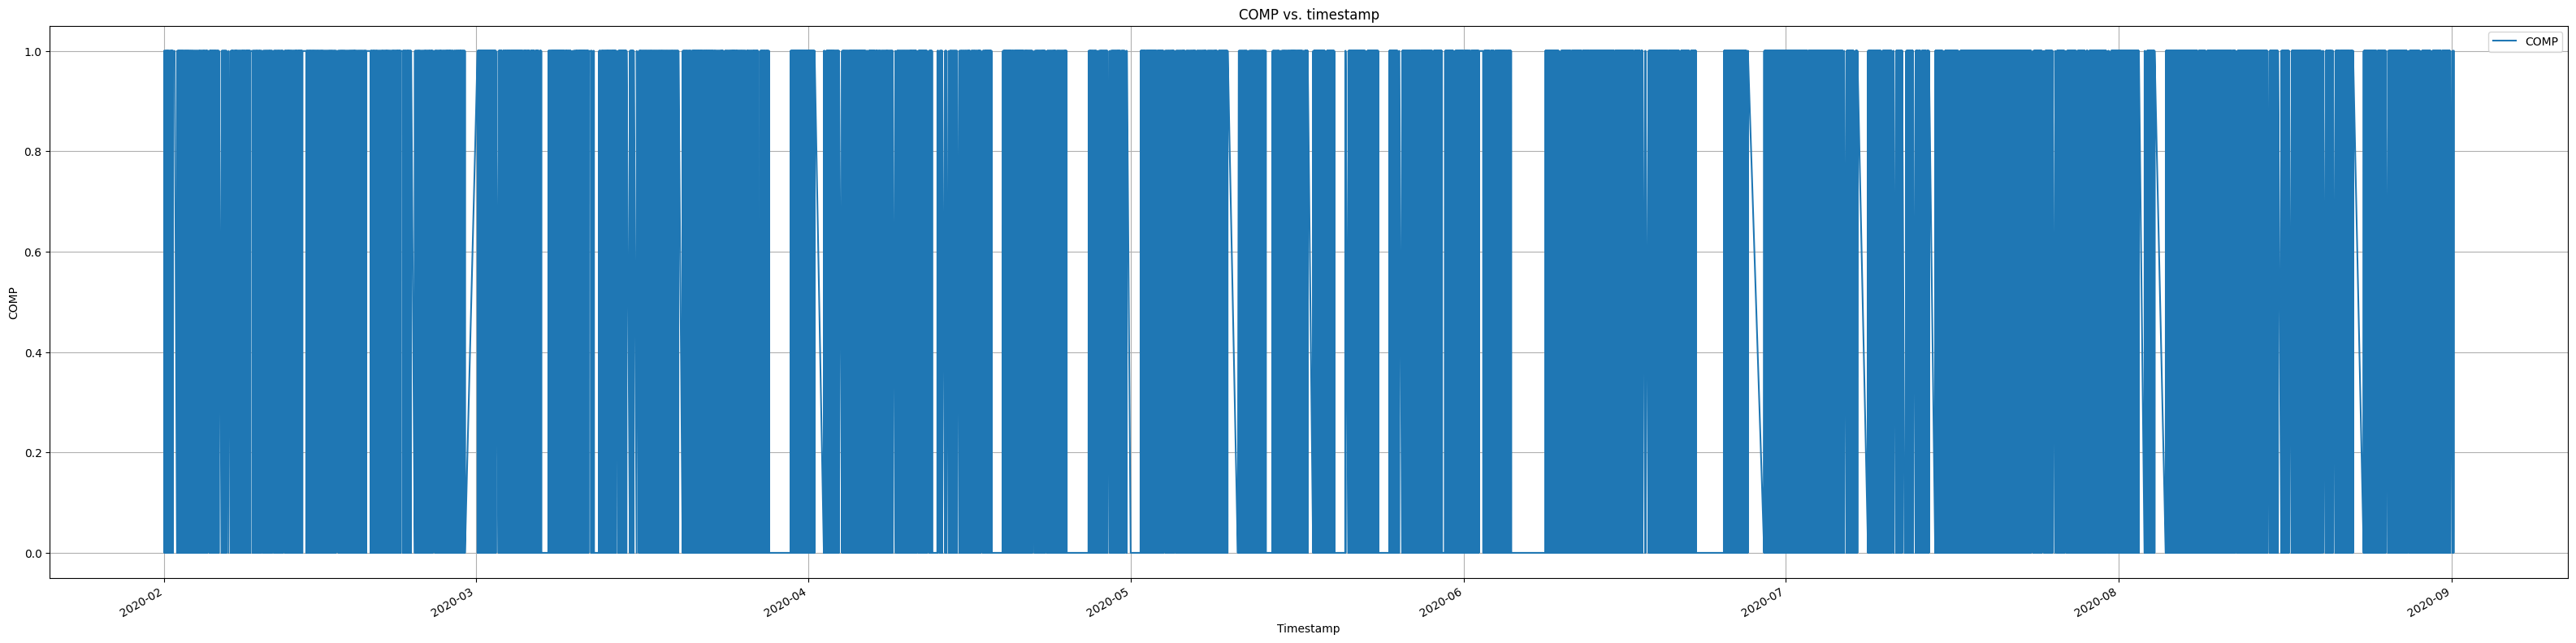

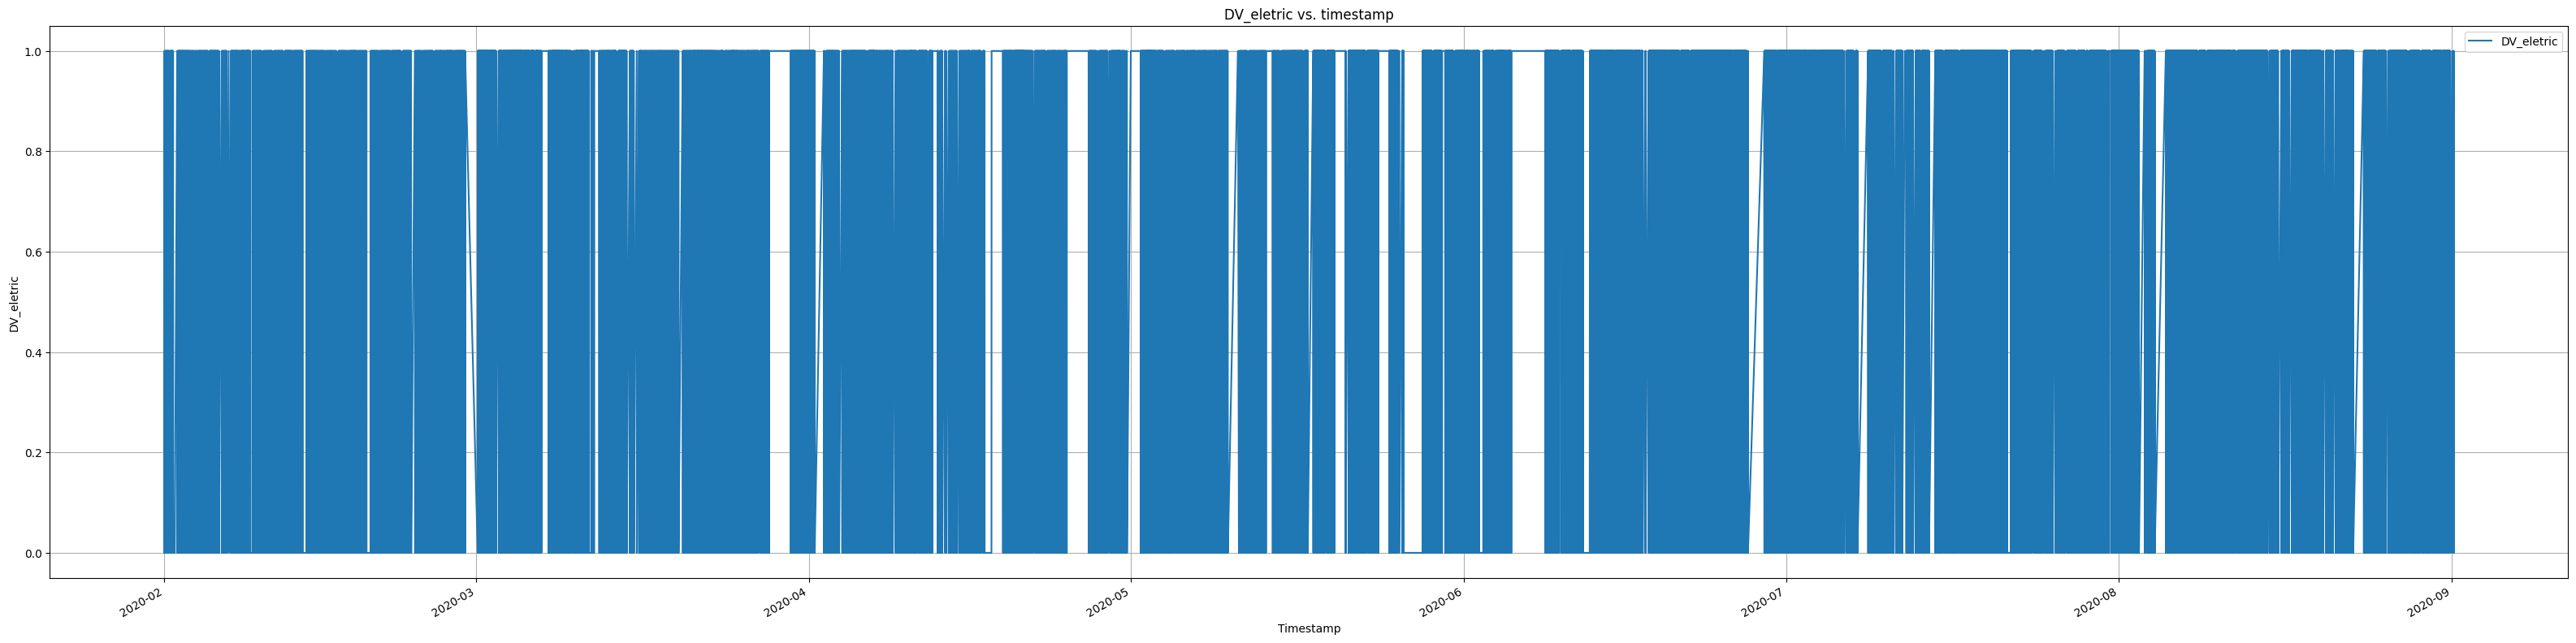

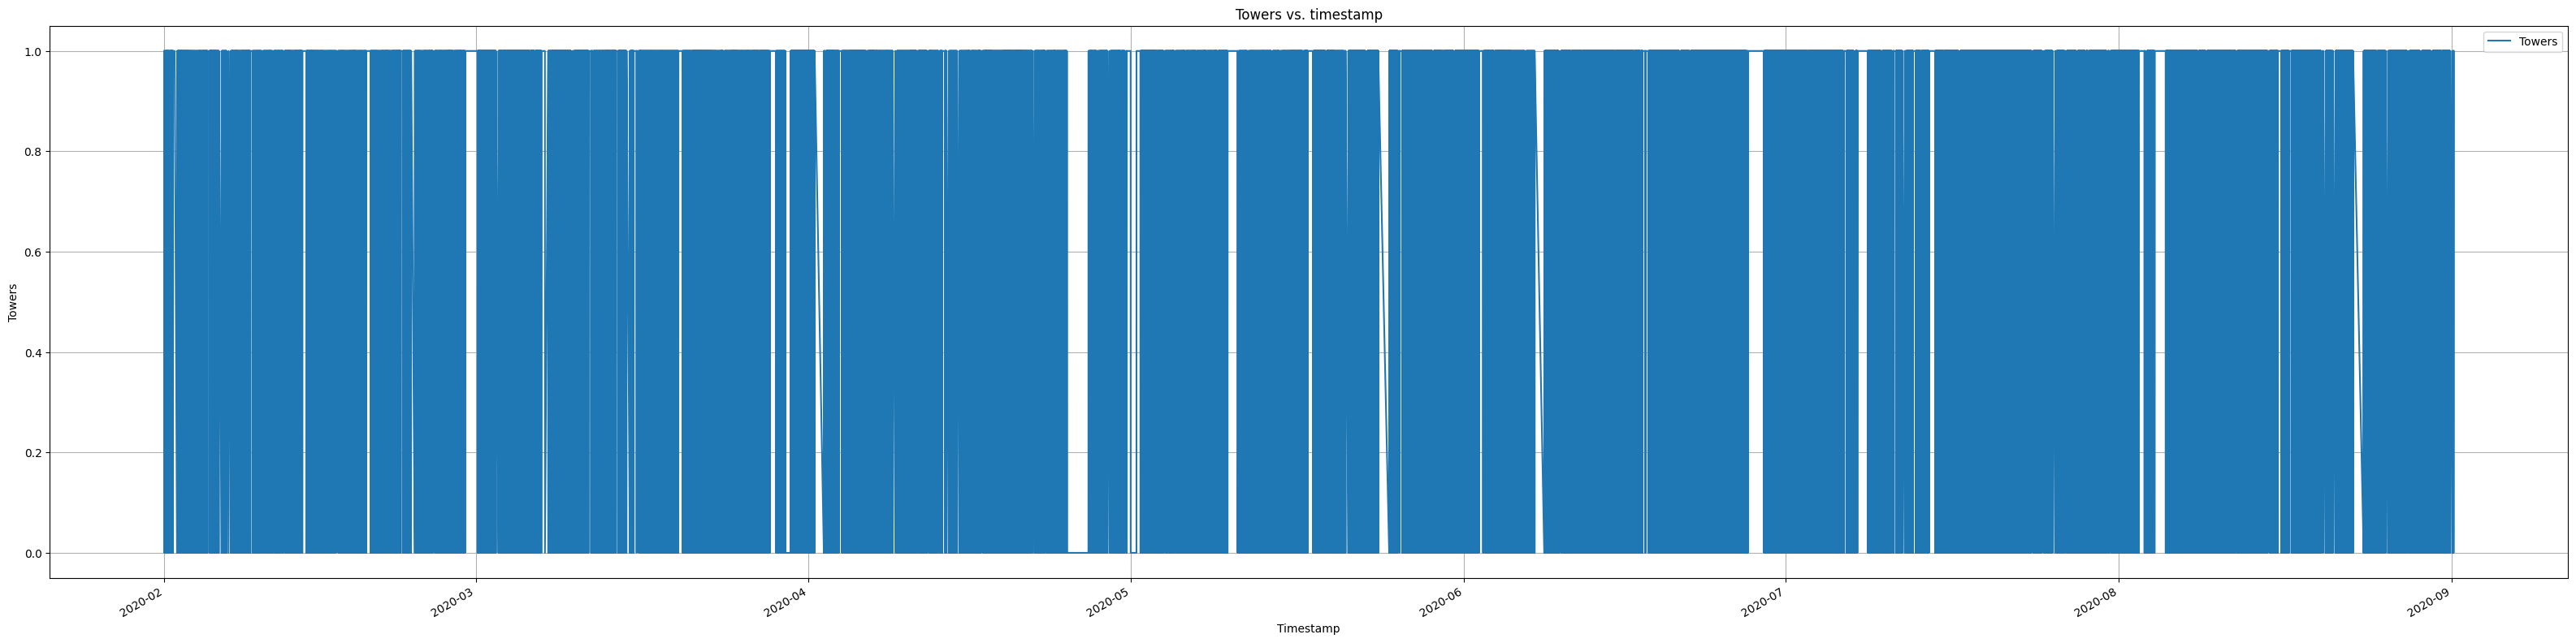

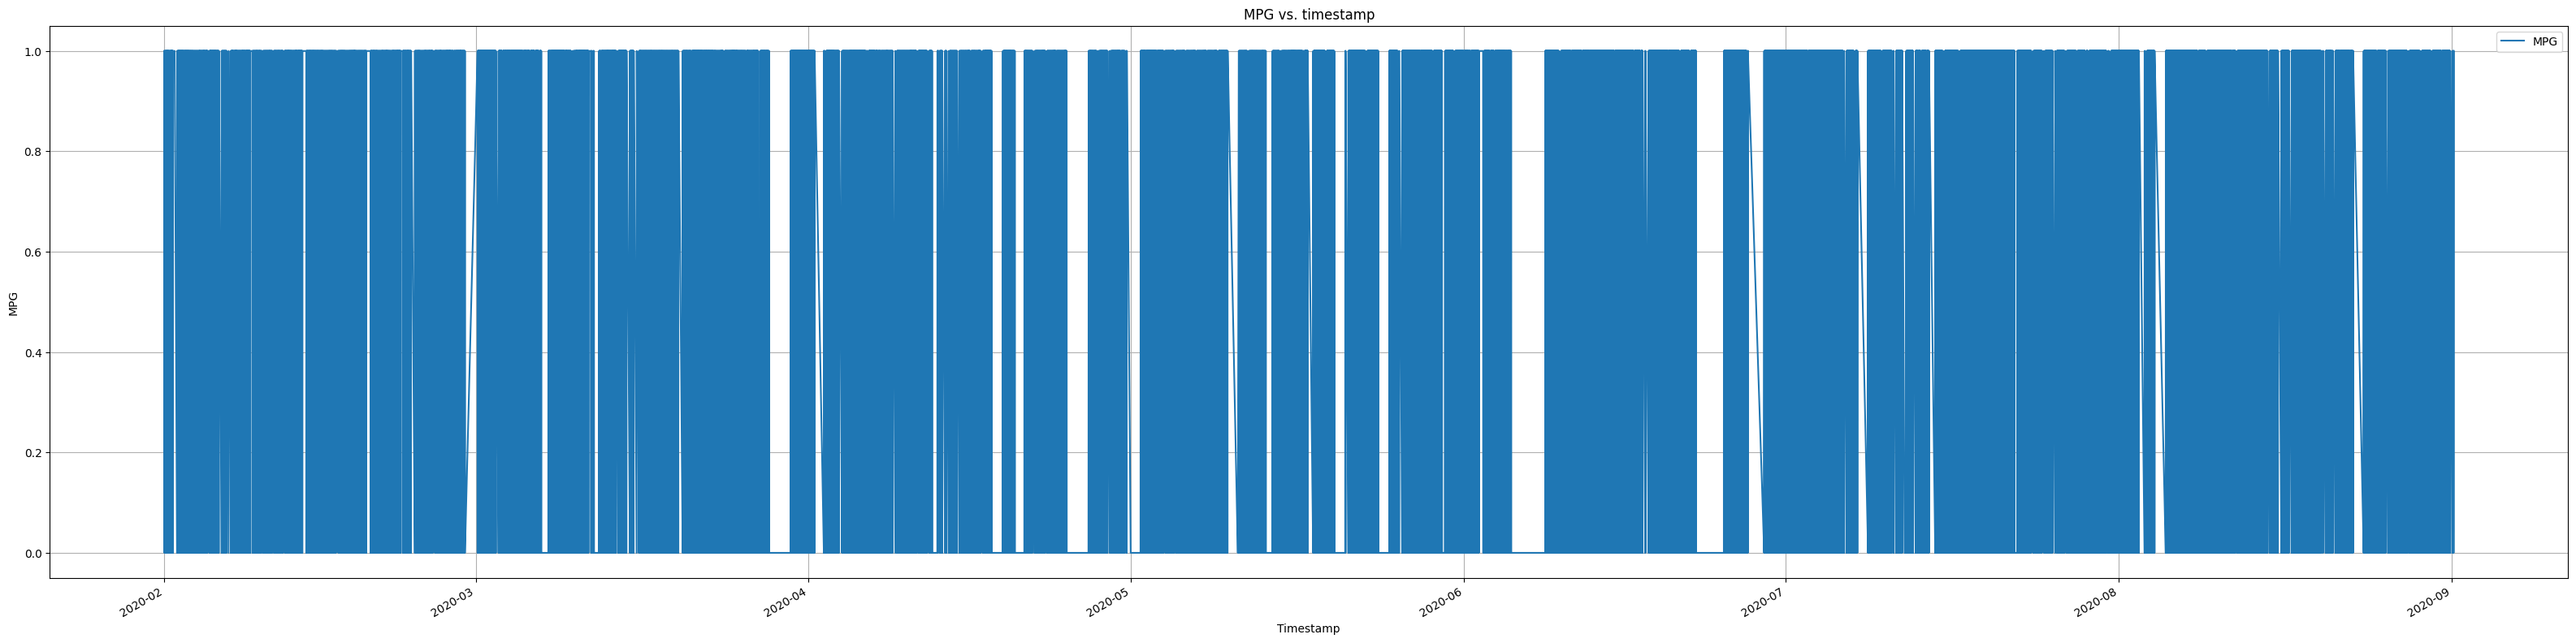

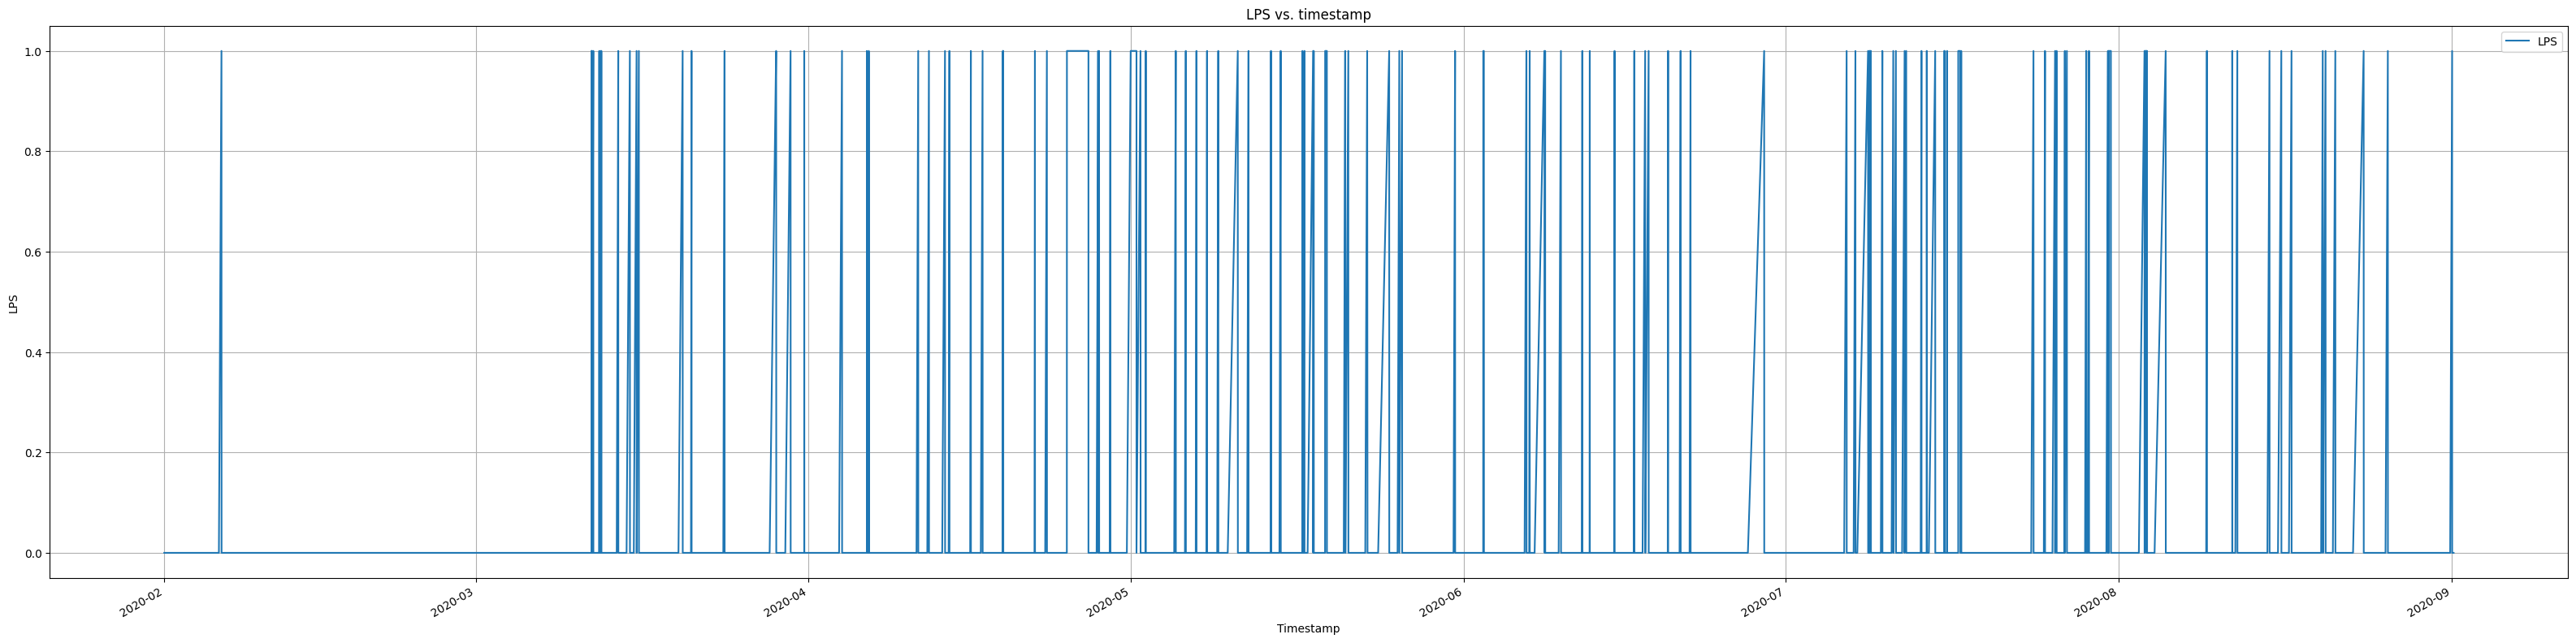

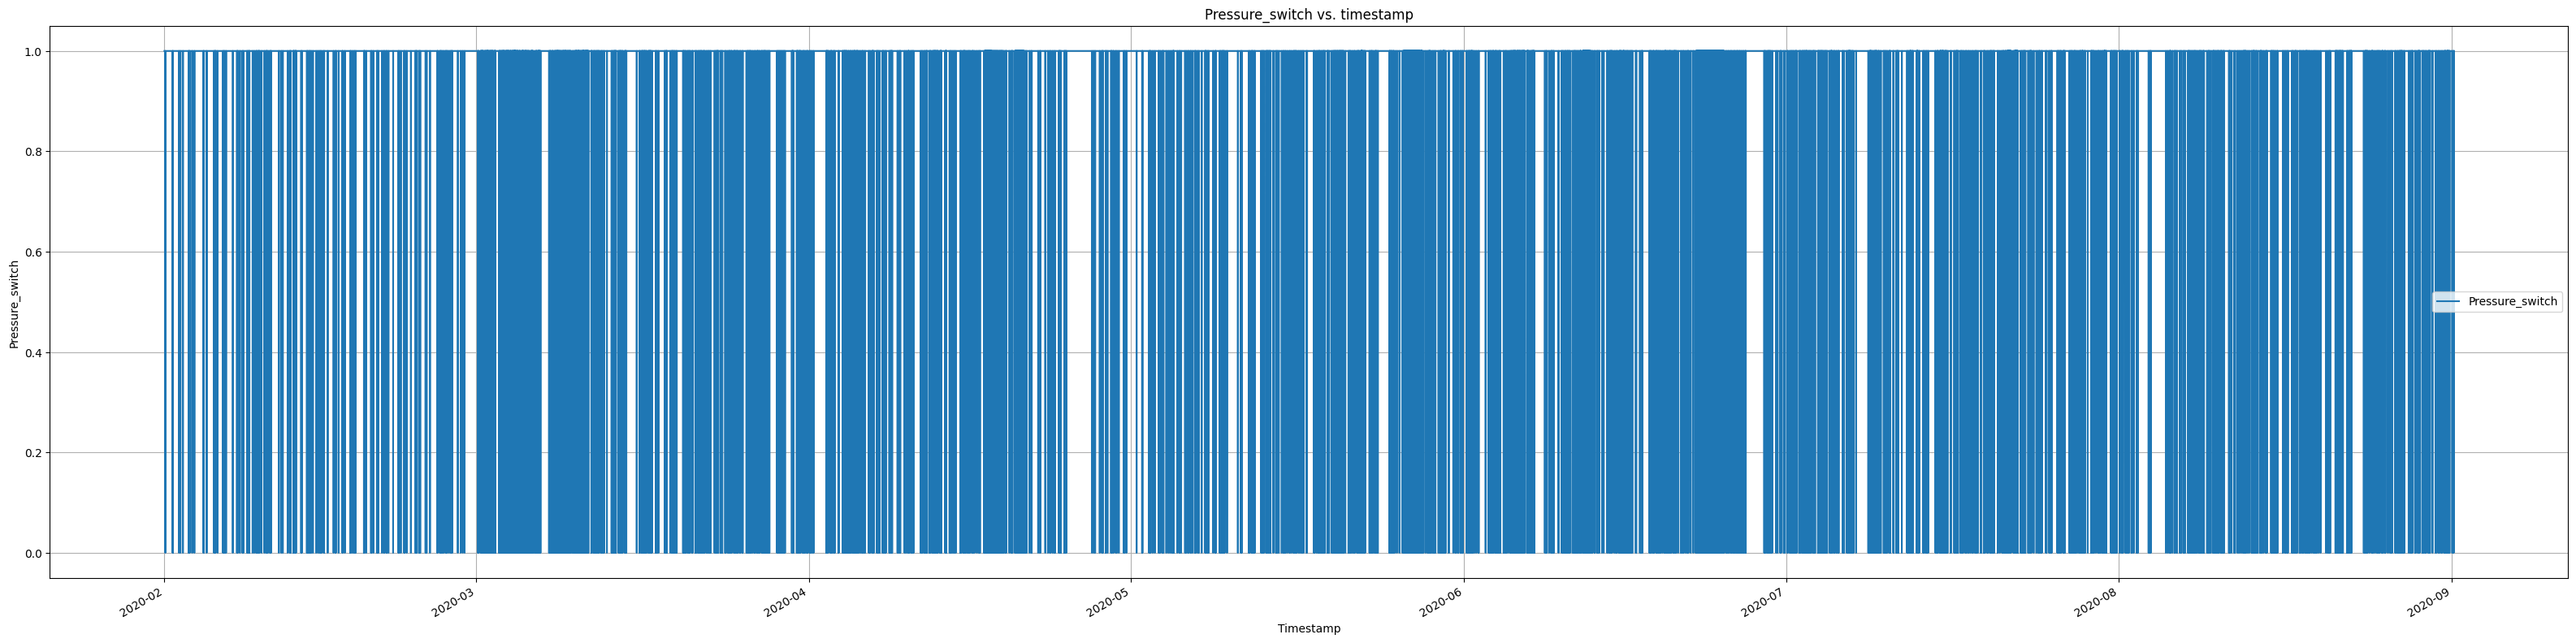

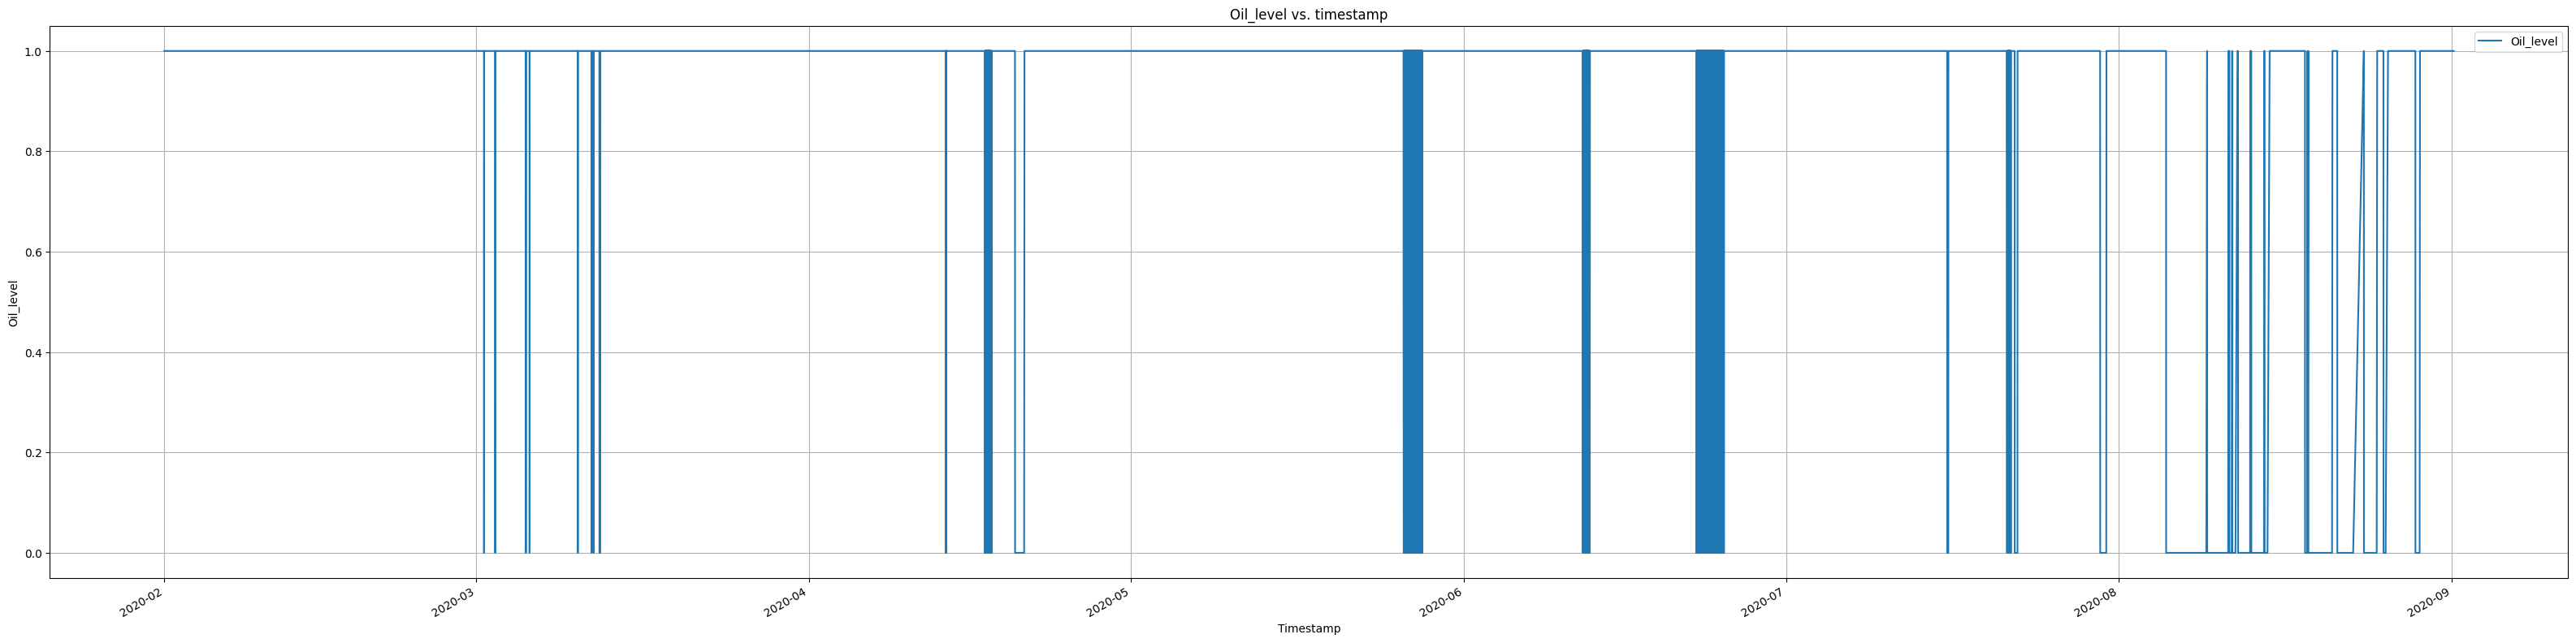

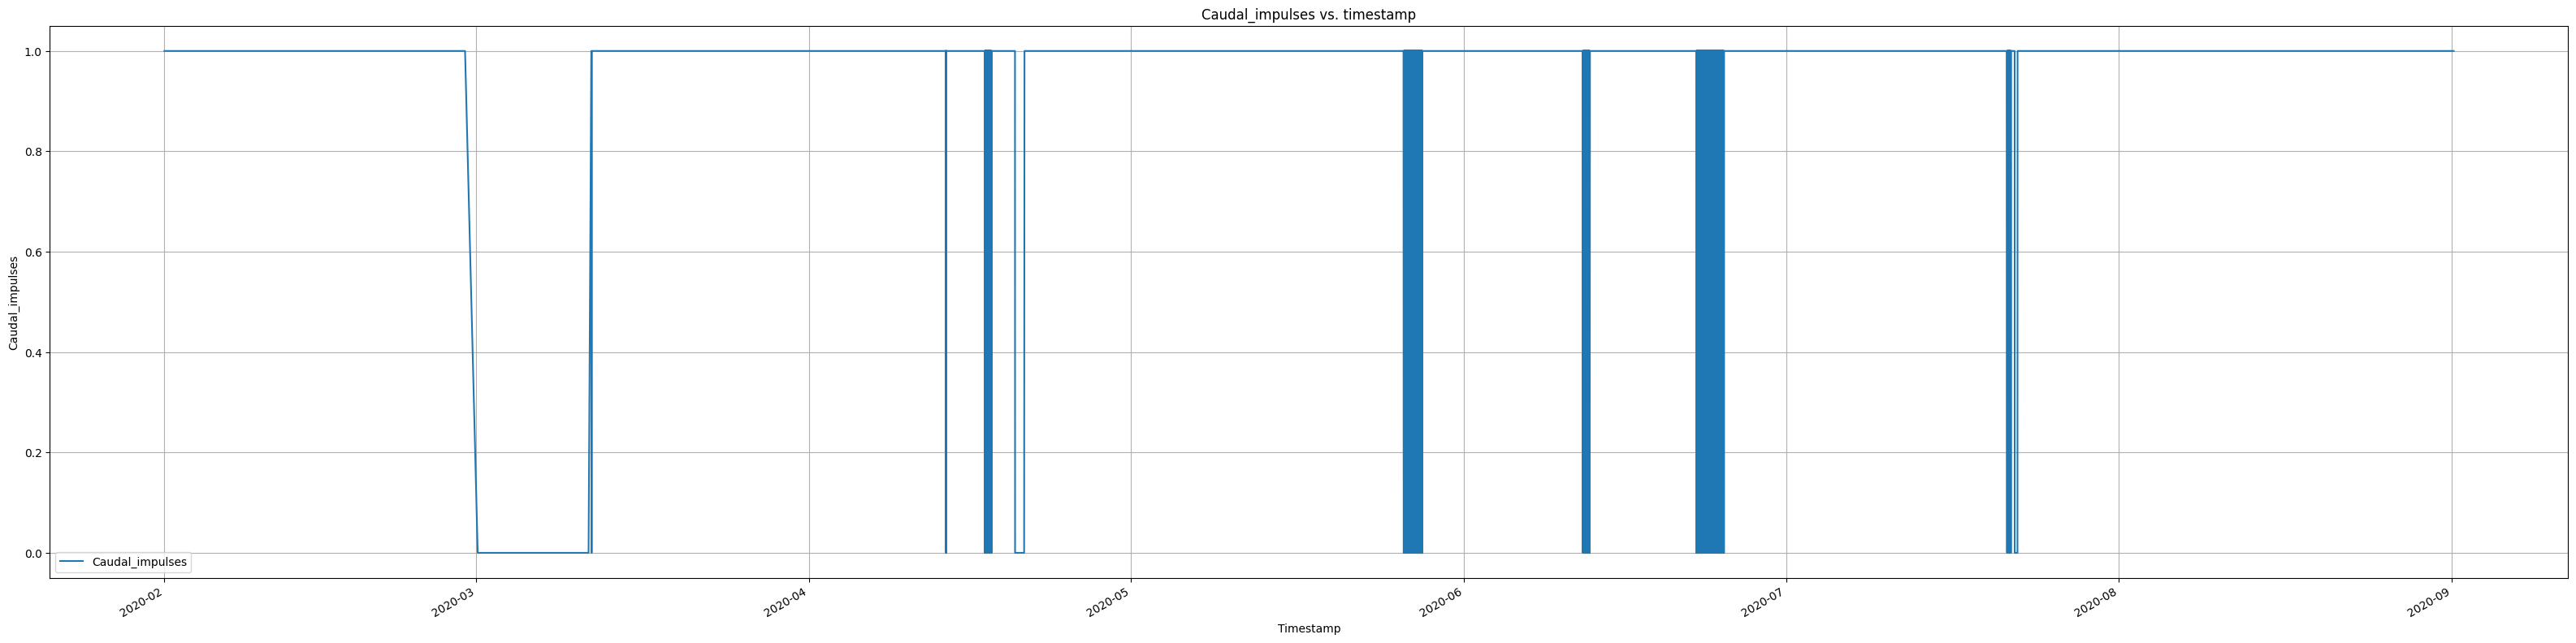

In [7]:
# change the type of timestamp column for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'])
features = df.columns.tolist()
features.pop(0)
for f in features:
    fig, ax = plt.subplots(figsize=(40, 10))  # Set the figure size
    df.plot(x='timestamp', y=f, kind='line', title=f'{f} vs. timestamp', ax=ax)
    plt.xlabel('Timestamp')
    plt.ylabel(f)
    plt.grid(True)
    plt.show()

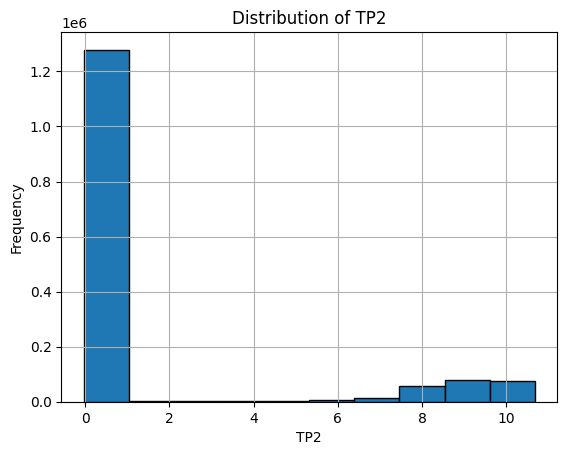

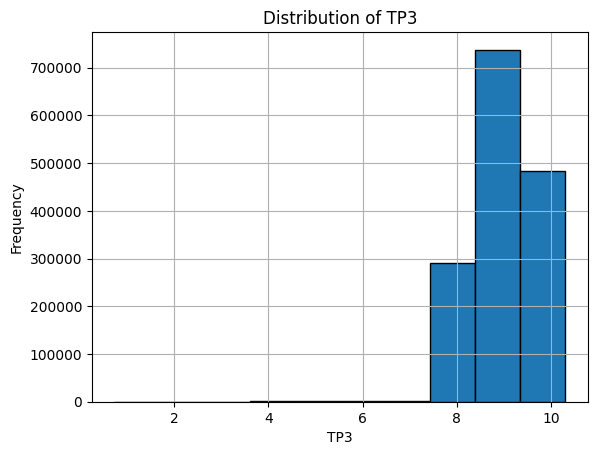

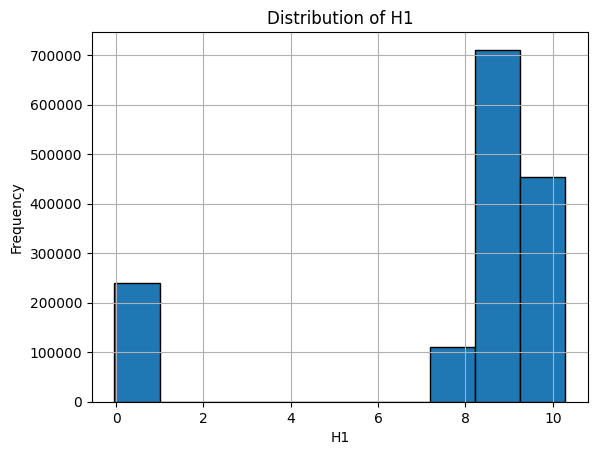

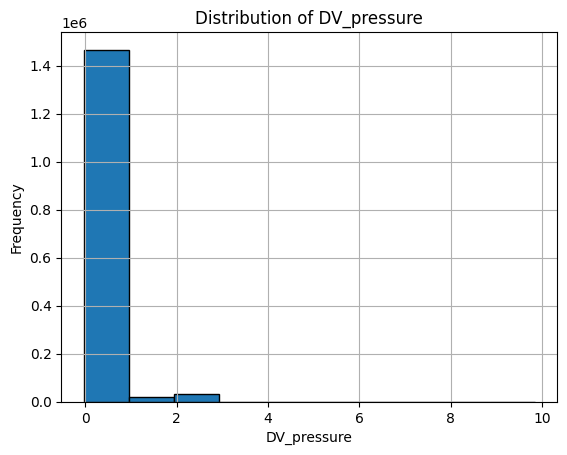

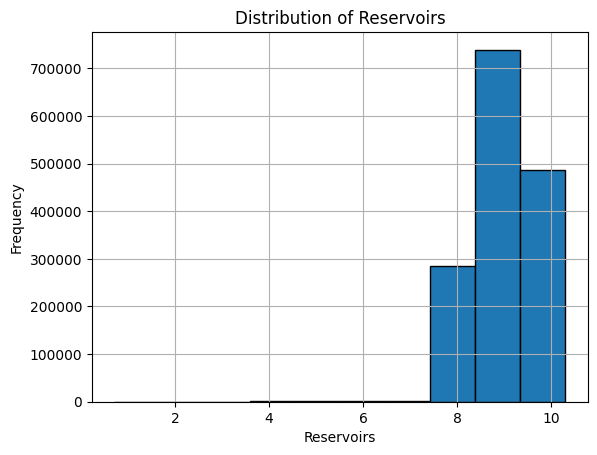

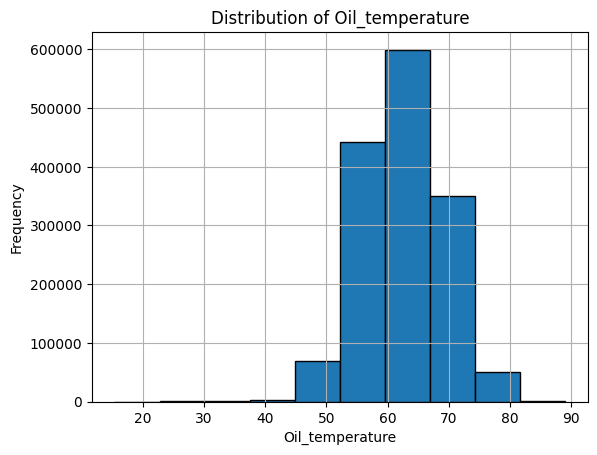

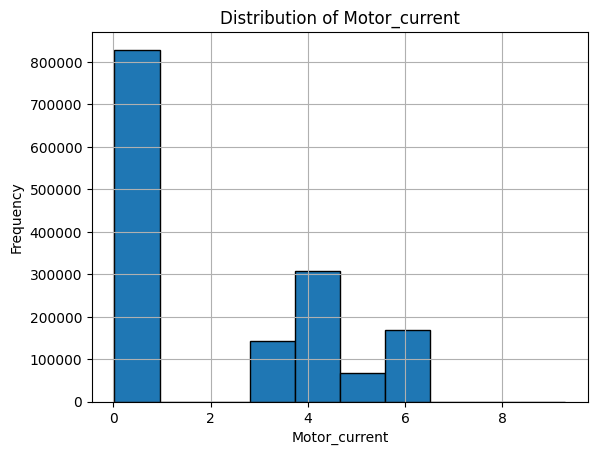

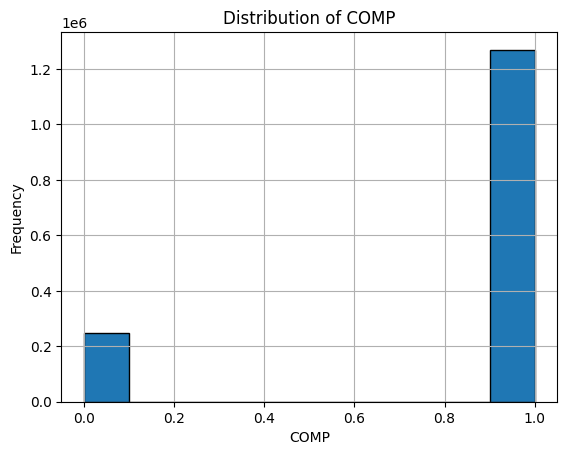

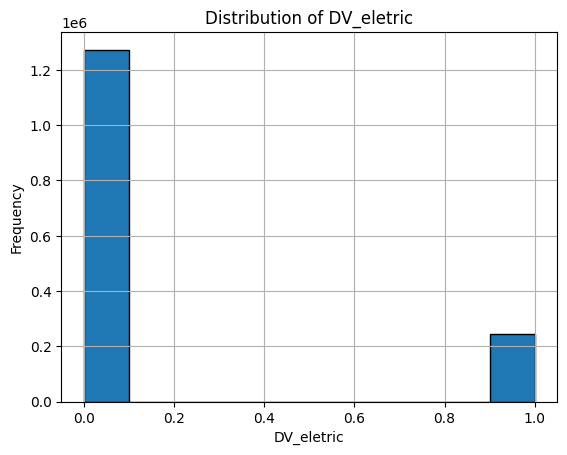

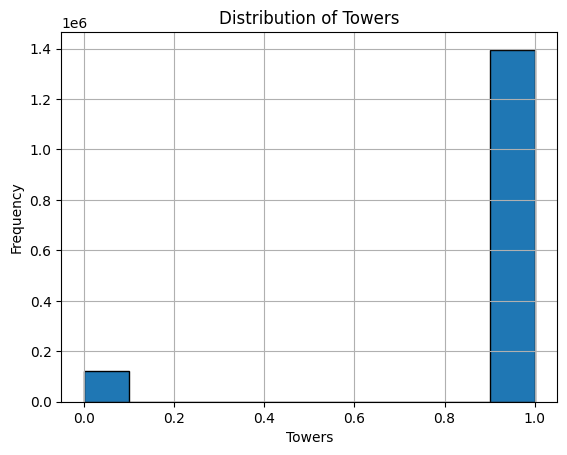

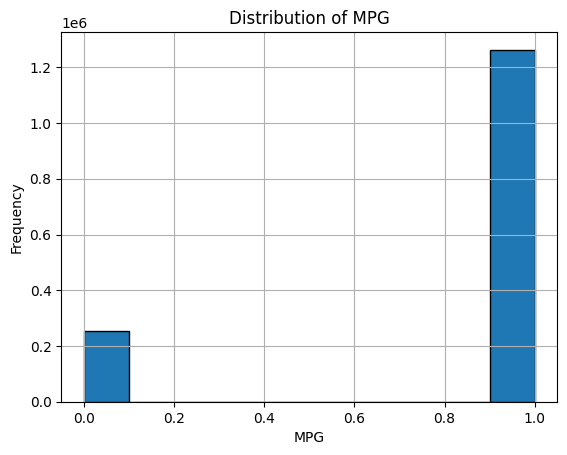

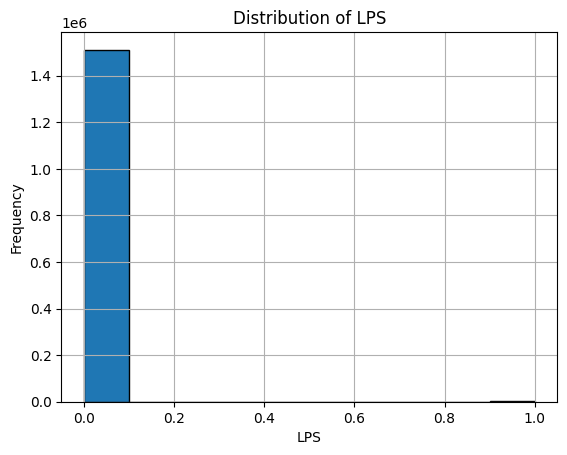

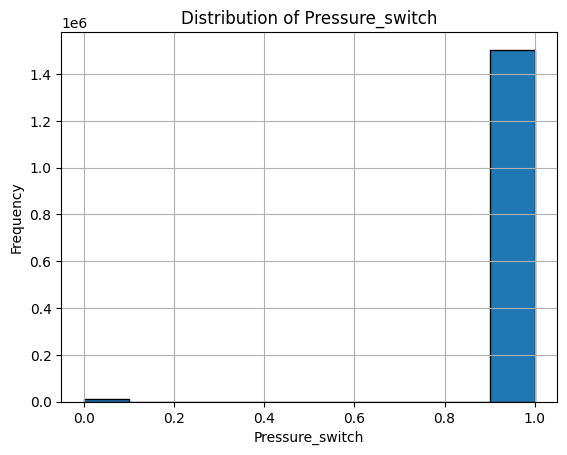

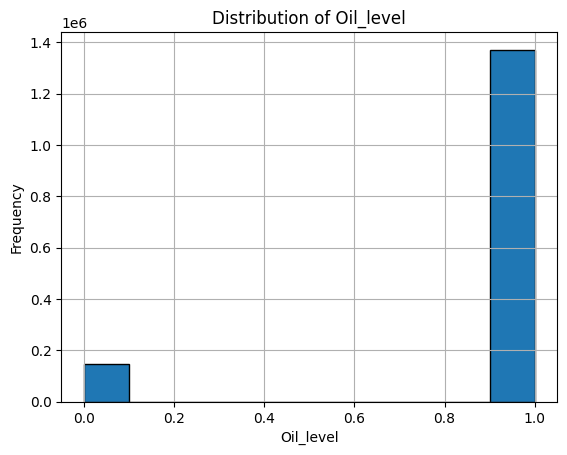

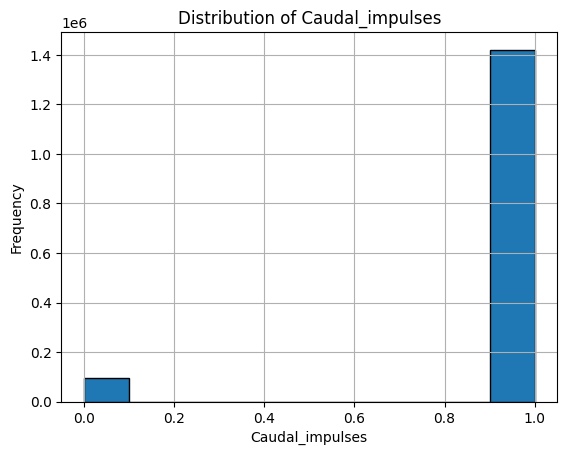

In [8]:
for column in features:
    plt.figure()
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

From the above two sets of figures, we can indeed see that some values, no matter the feature name, are away from the majority. There're too many instances for the time series data, so they may not be very clear to visualize the point anomalies.

Point Anomalies: a data point that is very different from the rest of the dataset.

## Anomaly Detection: Model

We will perform Isolation Forest,

Also, although we have an unlabeled dataset, we know some of the anomalies for testing purposes.

1. 4/18/2020.
2. 5/29/2020 till 5/30/2020. Repaired on 5/30/2020.
3. 6/5/2020 till 6/7/2020. Repaired on 6/8/2020.
4. 7/15/2020 till 7/15/2020. Repaired on 7/16/2020.

### Isolation Forest

Use all data as train.

In [9]:
# standardize the data
df_isofo = df[features]
std_scaler = StandardScaler()
df_isofo_scaled = std_scaler.fit_transform(df_isofo)
df_isofo_scaled_df = pd.DataFrame(df_isofo_scaled)
df_isofo_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.424441,0.584247,0.531575,-0.209090,0.583993,-1.387941,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1,-0.425056,0.568600,0.529175,-0.203860,0.568326,-1.376431,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
2,-0.424441,0.552953,0.526175,-0.203860,0.552660,-1.387941,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
3,-0.424441,0.537306,0.523175,-0.203860,0.536993,-1.414797,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
4,-0.424441,0.521659,0.520175,-0.203860,0.521327,-1.407124,-0.873208,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.425056,-0.104227,0.401370,-0.203860,-0.105331,-0.455657,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516944,-0.425056,-0.126133,0.395970,-0.198629,-0.127264,-0.467167,-0.871036,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516945,-0.425056,-0.148039,0.392369,-0.203860,-0.146064,-0.467167,-0.872122,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065
1516946,-0.424441,-0.169945,0.388769,-0.203860,-0.167997,-0.474840,-0.871036,0.441367,-0.437427,0.295188,0.448291,-0.058581,0.092937,0.325583,0.259065


In [10]:
# train the isolation forest model
outlier_fraction = 0.003 # fraction of being anomaly
isofo = IsolationForest(contamination=outlier_fraction)
isofo.fit(df_isofo_scaled_df)

IsolationForest(contamination=0.003)

In [11]:
df['anomaly_isofo'] = pd.Series(isofo.predict(df_isofo_scaled_df))
df

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,anomaly_isofo
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [12]:
df.loc[df['anomaly_isofo']==-1]

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,anomaly_isofo
229683,2020-03-03 02:51:45,4.472,3.876,-0.014,-0.028,3.874,39.425,4.9550,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
229684,2020-03-03 02:51:55,4.548,3.968,-0.012,-0.026,3.962,40.025,5.0000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
229685,2020-03-03 02:52:05,4.620,4.044,-0.014,-0.028,4.042,40.750,5.0625,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
229692,2020-03-03 02:53:14,5.214,4.644,-0.010,-0.026,4.642,44.925,5.1075,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
229693,2020-03-03 02:53:24,5.346,4.782,-0.012,-0.026,4.780,45.500,5.0825,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434588,2020-08-20 05:46:22,7.378,6.860,-0.010,-0.022,6.862,45.425,5.5600,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-1
1454438,2020-08-23 18:51:01,4.168,3.610,-0.008,-0.016,3.608,48.550,4.9775,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-1
1454439,2020-08-23 18:51:11,4.246,3.700,-0.008,-0.018,3.698,49.075,4.8600,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-1
1454440,2020-08-23 18:51:21,4.328,3.790,-0.008,-0.020,3.788,49.725,4.8900,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,-1


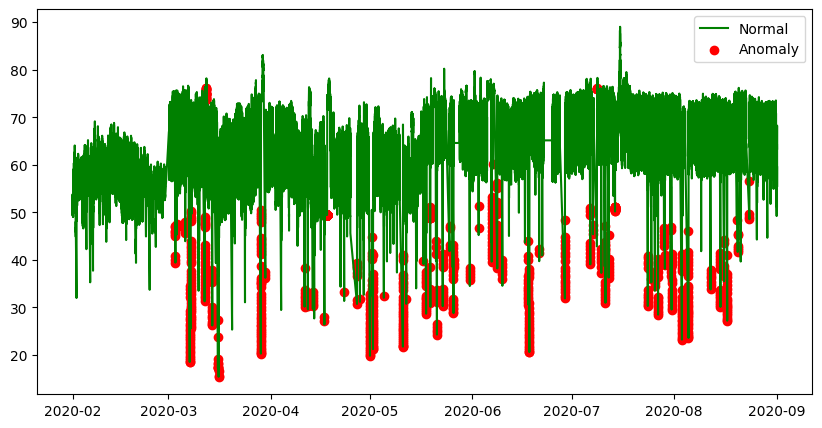

In [13]:
fig, ax = plt.subplots(figsize = (10, 5))

a = df.loc[df['anomaly_isofo'] == -1, ['timestamp', 'Oil_temperature']]

ax.plot(df['timestamp'], df['Oil_temperature'],
        color = 'green', label = 'Normal')

ax.scatter(a['timestamp'], a['Oil_temperature'],
           color = 'red', label = 'Anomaly')

plt.legend()
plt.show()

In [14]:
temp = df.loc[df['anomaly_isofo']==-1]
empty_date = []
for d in temp['timestamp']:
  d = str(d)
  if d[0:10] not in empty_date:
    empty_date.append(d[0:10])
empty_date

['2020-03-03',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-11',
 '2020-03-12',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-28',
 '2020-03-30',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-17',
 '2020-04-18',
 '2020-04-23',
 '2020-04-27',
 '2020-04-30',
 '2020-05-01',
 '2020-05-05',
 '2020-05-10',
 '2020-05-11',
 '2020-05-17',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-23',
 '2020-05-25',
 '2020-05-26',
 '2020-05-31',
 '2020-06-02',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-10',
 '2020-06-17',
 '2020-06-18',
 '2020-06-21',
 '2020-06-28',
 '2020-07-06',
 '2020-07-07',
 '2020-07-08',
 '2020-07-09',
 '2020-07-10',
 '2020-07-11',
 '2020-07-12',
 '2020-07-14',
 '2020-07-17',
 '2020-07-22',
 '2020-07-24',
 '2020-07-25',
 '2020-07-26',
 '2020-07-27',
 '2020-07-28',
 '2020-07-29',
 '2020-07-30',
 '2020-07-31',
 '2020-08-03',
 '2020-08-05',
 '2020-08-12',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18',
 '2020-08-

In [15]:
len(empty_date)

69

We see that the anomaly dates are recorded there, but there are also some other normal days treated as anomalous. So let's improve that.

Use author suggestion: first month to be training. the other months for testing.

In [16]:
df.drop(columns=['anomaly_isofo'],inplace=True)
train = df.loc[df['timestamp']<'2020-03-01']
test = df.loc[df['timestamp']>='2020-03-01']
train_scaled = std_scaler.fit_transform(train[features])
test_scaled = std_scaler.fit_transform(test[features])

In [17]:
isofo2 = IsolationForest(contamination=0.001)
isofo2.fit(train_scaled)

IsolationForest(contamination=0.001)

In [18]:
test['anomaly_isofo2'] = pd.Series(isofo2.predict(test_scaled))
test

<ipython-input-18-07666a048c51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['anomaly_isofo2'] = pd.Series(isofo2.predict(test_scaled))


,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,anomaly_isofo2
214850,2020-03-01 04:00:09,-0.010,9.510,9.502,-0.026,9.508,67.025,3.8275,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
214851,2020-03-01 04:00:19,-0.012,9.494,9.484,-0.026,9.490,66.950,3.7975,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
214852,2020-03-01 04:00:29,-0.012,9.476,9.466,-0.026,9.474,66.825,3.7725,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
214853,2020-03-01 04:00:38,-0.010,9.458,9.450,-0.026,9.454,66.725,3.8825,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
214854,2020-03-01 04:00:48,-0.010,9.440,9.432,-0.026,9.438,66.675,3.8925,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN


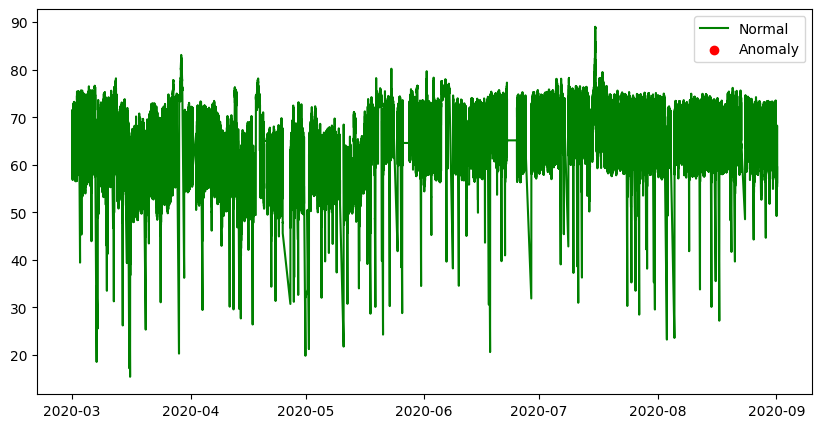

In [19]:
fig2, ax2 = plt.subplots(figsize = (10, 5))

a2 = test.loc[test['anomaly_isofo2'] == -1, ['timestamp', 'Oil_temperature']]

ax2.plot(test['timestamp'], test['Oil_temperature'],
        color = 'green', label = 'Normal')

ax2.scatter(a2['timestamp'], a2['Oil_temperature'],
           color = 'red', label = 'Anomaly')

plt.legend()
plt.show()

In [20]:
temp2 = test.loc[test['anomaly_isofo2']==-1]
empty_date2 = []
for d in temp2['timestamp']:
  d = str(d)
  if d[0:10] not in empty_date2:
    empty_date2.append(d[0:10])
empty_date2

['2020-03-05', '2020-03-15', '2020-03-27']

We can see that

### DBSCAN

Minimum samples (“MinPts”): the fewest number of points required to form a cluster

ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

Find MinPts and epsilon. dim = the dimensions of your data set (Sander et al., 1998).

In [21]:
df

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


Plot a K-distance graph to decide the epsilon value for DBSCAN

In [22]:
from sklearn.neighbors import NearestNeighbors
#neighbors = NearestNeighbors(n_neighbors=30)
#neighbors_fit = neighbors.fit(df[features])
#distances, indices = neighbors_fit.kneighbors(df[features])

In [23]:
#distances = np.sort(distances, axis=0)
#distances = distances[:,1]

In [24]:
#plt.xlim(1516800,1517000)
#plt.plot(distances)

From the above K distance figure, we can see that the optimal value for  epsilon is around 3 to 4.

In [25]:
#from sklearn.cluster import DBSCAN
#from sklearn.preprocessing import MinMaxScaler
#mms = MinMaxScaler() # nullify the noise in the data set, normalize the data through Min_Max Scaler
#df[features] = mms.fit_transform(df[features])

In [26]:
#df_apr = df.loc[(df['timestamp']<'2020-05-01') & (df['timestamp']>='2020-04-01')]
#df_may = []
#df_jun = []
#df_jul = []

### One class SVM

In [28]:
from sklearn.svm import OneClassSVM
svm_data = df[features]
scaler_svm = StandardScaler()
svm_data_scaled = scaler_svm.fit_transform(svm_data)
svm_dara_scaled_df = pd.DataFrame(svm_data_scaled)
osvm = OneClassSVM(nu = 0.001,
                   kernel = 'rbf',
                   gamma = 'scale')
osvm.fit(svm_dara_scaled_df)
df['anomaly_svm'] = pd.Series(osvm.predict(svm_dara_scaled_df))

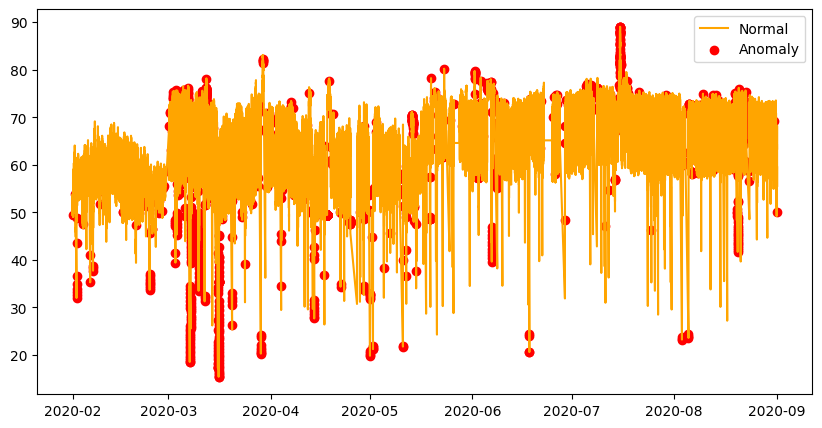

In [30]:
fig5, ax5 = plt.subplots(figsize = (10, 5))

a5 = df.loc[df['anomaly_svm'] == -1,
           ['timestamp', 'Oil_temperature']]

ax5.plot(df['timestamp'], df['Oil_temperature'],
        color = 'orange',
        label = 'Normal')

ax5.scatter(a5['timestamp'], a5['Oil_temperature'],
           color = 'red',
           label = 'Anomaly')

plt.legend()
plt.show()

In [32]:
temp4 = df.loc[df['anomaly_svm']==-1]
empty_date4 = []
for d in temp4['timestamp']:
  d = str(d)
  if d[0:10] not in empty_date4:
    empty_date4.append(d[0:10])
empty_date4

['2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-13',
 '2020-02-16',
 '2020-02-17',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-27',
 '2020-02-28',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-

### Auto Encoder

In [33]:
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers